In [1]:
import gym
import pickle

from human import TerminalHuman
from keyboard_agent import *
from utils import *
from LearnAtariReward import *

import os
import glob

c:\Users\suba\.conda\envs\cpsc672\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
c:\Users\suba\.conda\envs\cpsc672\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env = gym.make('LunarLander-v2')

c:\Users\suba\.conda\envs\cpsc672\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
play(env, 30, None, True)

In [ ]:
demo_files = play(env, 30, 0, True)

In [ ]:
demo_files

In [ ]:
# save the demosntrations
# output = play(env, 0, save=False)
# res = play_rand(env, 15, 0, save=True)

In [ ]:
demo_files = ['1669268176.6269968',
 '1669268196.0336297',
 '1669268212.2845922',
 '1669268231.2647314',
 '1669268269.2316186',
 '1669268294.8198466',
 '1669268315.7406812',
 '1669268331.8071287',
 '1669268365.5589268',
 '1669268383.076348']

In [3]:
demo_path = 'data/demonstrations'
demo_files = glob.glob(f"{demo_path}/gym-*.pickle")

In [ ]:
demo_files

In [4]:

demonstrations = [pickle.load(open(demo_name, 'rb'), encoding='latin1') for demo_name in demo_files] # load from files
# demos[demo #] = control, state

In [ ]:
demonstrations[0][2]

In [5]:
# sorted best to worst demos
sorted_demonstrations = [(states, controls) for controls, states, reward in sorted(demonstrations, key=lambda pair: pair[2])]
sorted_rewards = [reward for controls, states, reward in sorted(demonstrations, key=lambda pair: pair[2])]

In [ ]:
watch(env, sorted_demonstrations[5][1], 0)

In [ ]:
min([len(demonstrations[i][0]) for i in range(len(demonstrations))])

In [6]:
num_trajs =  0
num_snippets = 6000
min_snippet_length =  min(np.min([len(d[0]) for d in sorted_demonstrations]), 30) #min length of trajectory for training comparison
maximum_snippet_length = 100
max_snippet_length = min(np.min([len(d[0]) for d in sorted_demonstrations]), maximum_snippet_length)

In [7]:
# auto labelling, but this can be done with preference ranking
training_obs, training_labels = create_training_data(sorted_demonstrations, num_trajs, num_snippets, min_snippet_length, max_snippet_length)

maximum traj length 20


In [8]:
testing_obs = training_obs[:1000]
training_obs = training_obs[1000:]

testing_labels = training_labels[:1000]
training_labels = training_labels[1000:]
len(testing_obs)
len(training_obs)

5000

In [ ]:
len(training_obs[0][1][0])

In [9]:
lr = 0.0005
weight_decay = 0.0
num_iter = 20 #num times through training data
l1_reg=0.0

In [11]:
reward_net = Net(3)

import torch.optim as optim
optimizer = optim.Adam(reward_net.parameters(),  lr=1e-4)#lr, weight_decay=weight_decay)

reward_model_path = 'reward_model/model0.pth'

learn_reward(reward_net, optimizer, training_obs, training_labels, testing_obs, testing_labels, num_iter, l1_reg, reward_model_path) #path is where to save the model
#save reward network
torch.save(reward_net.state_dict(), reward_model_path)

cpu
epoch: 0, train acc: 0.1582, test_acc: 0.199
epoch: 1, train acc: 0.2996, test_acc: 0.338
epoch: 2, train acc: 0.7874, test_acc: 0.76
epoch: 3, train acc: 0.868, test_acc: 0.85
epoch: 4, train acc: 0.8816, test_acc: 0.854
epoch: 5, train acc: 0.8826, test_acc: 0.856
epoch: 6, train acc: 0.8834, test_acc: 0.854
epoch: 7, train acc: 0.8826, test_acc: 0.856
epoch: 8, train acc: 0.8808, test_acc: 0.851
epoch: 9, train acc: 0.882, test_acc: 0.858
epoch: 10, train acc: 0.8814, test_acc: 0.854
epoch: 11, train acc: 0.8792, test_acc: 0.856
epoch: 12, train acc: 0.883, test_acc: 0.853
epoch: 13, train acc: 0.8828, test_acc: 0.851
epoch: 14, train acc: 0.8822, test_acc: 0.855
epoch: 15, train acc: 0.8814, test_acc: 0.855
epoch: 16, train acc: 0.883, test_acc: 0.854
epoch: 17, train acc: 0.8814, test_acc: 0.854
epoch: 18, train acc: 0.883, test_acc: 0.853
epoch: 19, train acc: 0.8832, test_acc: 0.856
finished training loss 0.015036454424262047


1st see how it learns reward "Network"

In [12]:
with torch.no_grad():
        pred_returns = [predict_traj_return(reward_net, np_features(traj[0])) for traj in sorted_demonstrations]
        # pred_returns = [predict_traj_return(reward_net, traj[0]) for traj in sorted_demonstrations]
for i, p in enumerate(pred_returns):
    print(i,sorted_rewards[i], p)

0 -291.7222555368397 143.41973036527634
1 -251.01655448420595 117.07770991325378
2 -223.70881531278718 76.98650270700455
3 -143.8074527449122 69.1799281835556
4 -118.19526083032189 113.60266447067261
5 -108.2070801095955 40.402924954891205
6 -106.38767104012021 127.80685657262802
7 -86.36027015724082 108.90137052536011
8 -81.69127625803537 65.23313641548157
9 -71.98536950730443 66.54239851236343
10 -68.63836620121113 130.27660405635834
11 -67.26281517057744 317.0388298034668
12 -67.04264814660908 118.5886800289154
13 -66.59234274714592 123.46793621778488
14 -60.42417660248355 122.87795346975327
15 -54.71713891904837 70.98182064294815
16 -54.61903617491768 27.796264231204987
17 -48.177753233709694 107.35404586791992
18 -42.40252030765484 89.95694899559021
19 -34.47642888403563 132.23852491378784
20 -33.73826673831135 88.83306330442429
21 -33.39060638180224 95.2763637304306
22 -33.222897127083414 111.71727687120438
23 -30.960457563872282 155.3644552230835
24 -29.041926781472142 101.19503

In [13]:
import matplotlib.pyplot as plt

In [ ]:
sorted_rewards

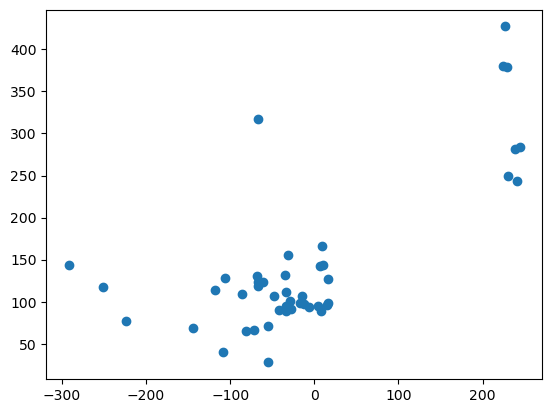

In [15]:
plt.scatter(sorted_rewards,pred_returns)

In [ ]:
plt.scatter(pred_returns, sorted_rewards)

In [ ]:
reward_net.state_dict()

In [16]:
torch.save(reward_net.state_dict(), "baselines/learned_models/lunar_lander_1.params")

In [ ]:
# H = TerminalHuman(env, 'approx')

In [ ]:
# out = H.input(demos)

In [ ]:
# true_weight = [-0.4, 0.4, -0.2, -0.7]